In [1]:
import keras
import cv2
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


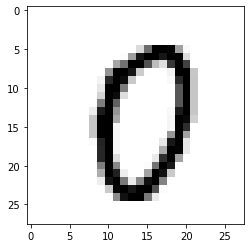

In [3]:
plt.imshow(x_train[1000],cmap="binary")

In [4]:
x_train = x_train/255.
x_test = x_test/255.

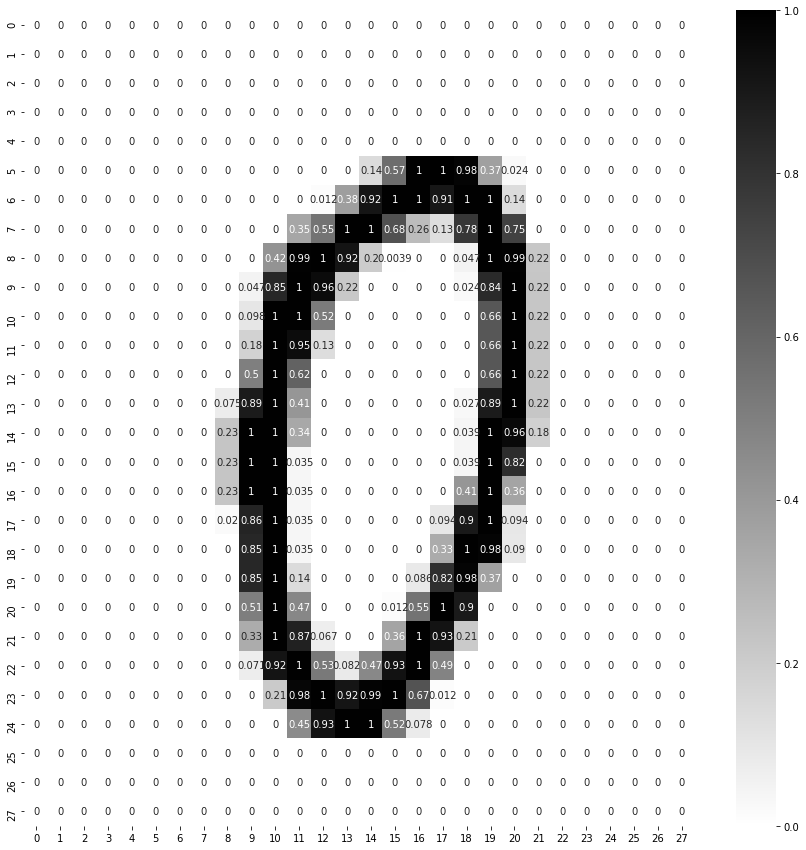

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[1000], annot=True, cmap="binary")

In [6]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
y_train[1000]

0

In [9]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
y_train[1000]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Building the Model Architecture

model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test),callbacks=[early_stopping_cb])


Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.9057 - val_loss: 0.1180 - val_accuracy: 0.9624
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1010 - accuracy: 0.9688 - val_loss: 0.0676 - val_accuracy: 0.9789
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9784 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0426 - val_accuracy: 0.9865
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0487 - val_accuracy: 0.9849
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 

In [12]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9866
Test Loss: 0.049924083054065704
Test accuracy: 0.9865999817848206


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
from google.colab import files

In [15]:
from google.colab.patches import cv2_imshow
import numpy as np
from keras_preprocessing import image
import tensorflow as tf
# from keras.preprocessing import decode_predictions

In [16]:
files.upload()

Saving eight.JPG to eight.JPG
Saving five.JPG to five.JPG
Saving nine.JPG to nine.JPG
Saving one.JPG to one.JPG
Saving seven.JPG to seven.JPG
Saving six.JPG to six.JPG
Saving three.JPG to three.JPG
Saving two.JPG to two.JPG
Saving zero.JPG to zero.JPG


{'eight.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xe1\x10\xdaExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00\x05\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08P\x9c\x9d\x00\x01\x00\x00\x00\n\x00\x00\x10\xc8\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [18]:
def predict_(img_path):
  img = mpimg.imread(img_path) 
  im = cv2.resize(img,  (28, 28))
  gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  imagem = cv2.bitwise_not(gray)
  imagem = imagem/255.
  plt.imshow(imagem)
  plt.figure(figsize=(15,15))
  sns.heatmap(imagem, annot=True, cmap="binary")
  imagem_resize = imagem.reshape(imagem.shape[0], 28, 1)
  x = np.expand_dims(imagem_resize, axis=0)
  y_pred = model.predict(x)
  print(np.argmax(y_pred))

8


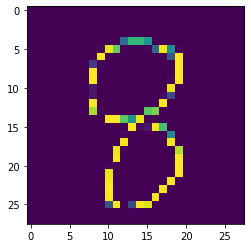

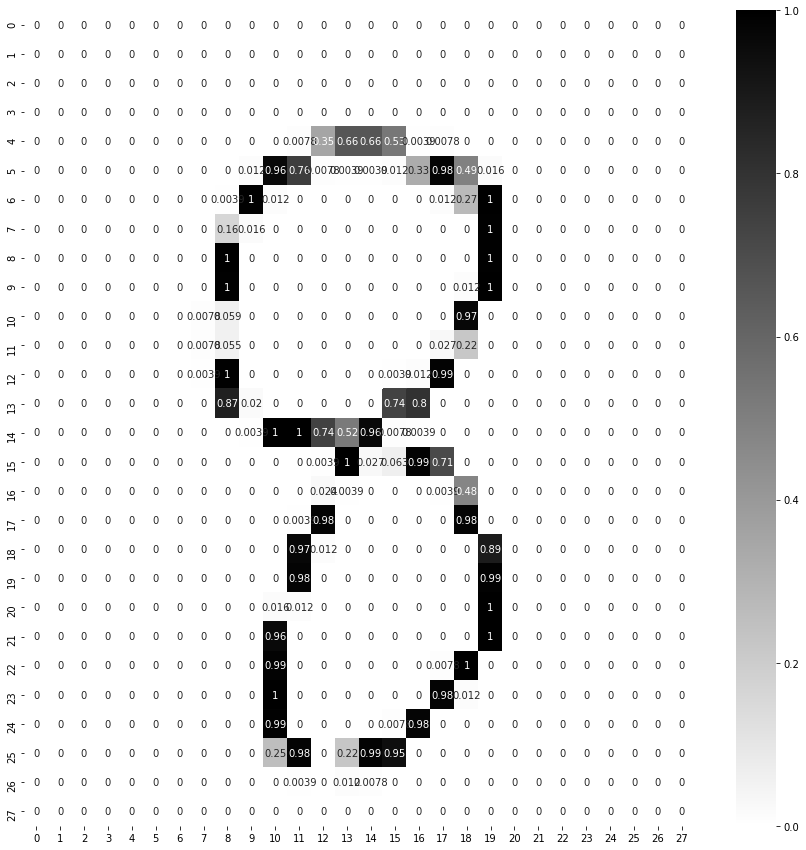

In [19]:
predict_("eight.JPG")

5


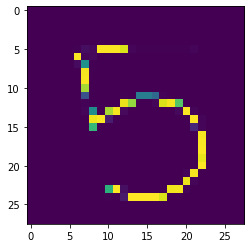

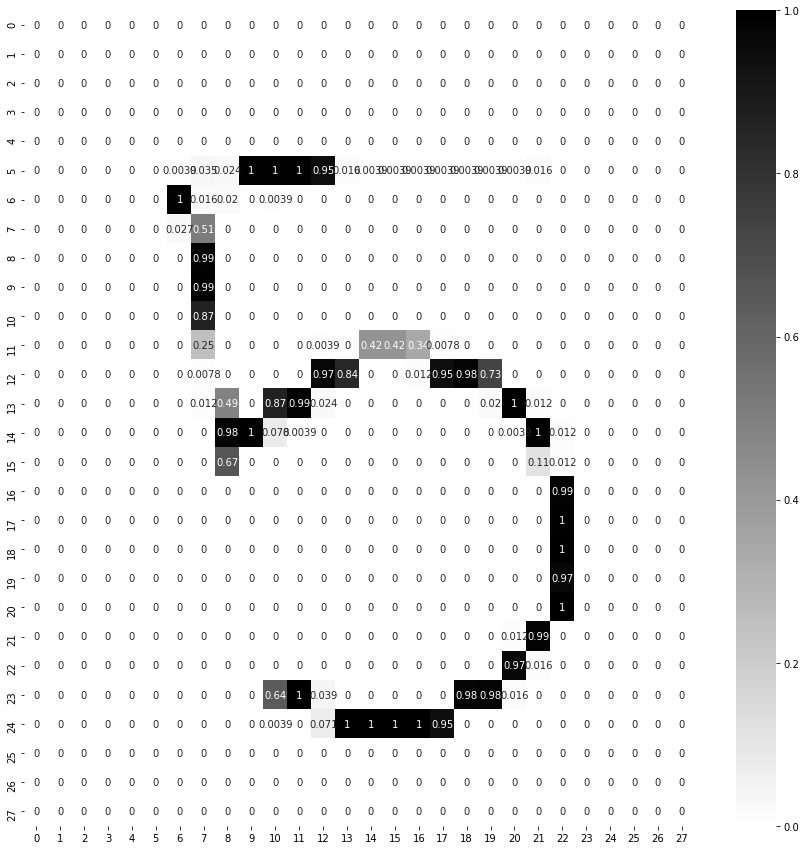

In [20]:
predict_("five.JPG")

9


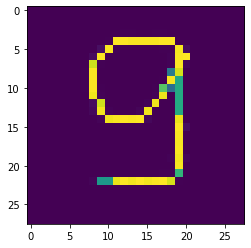

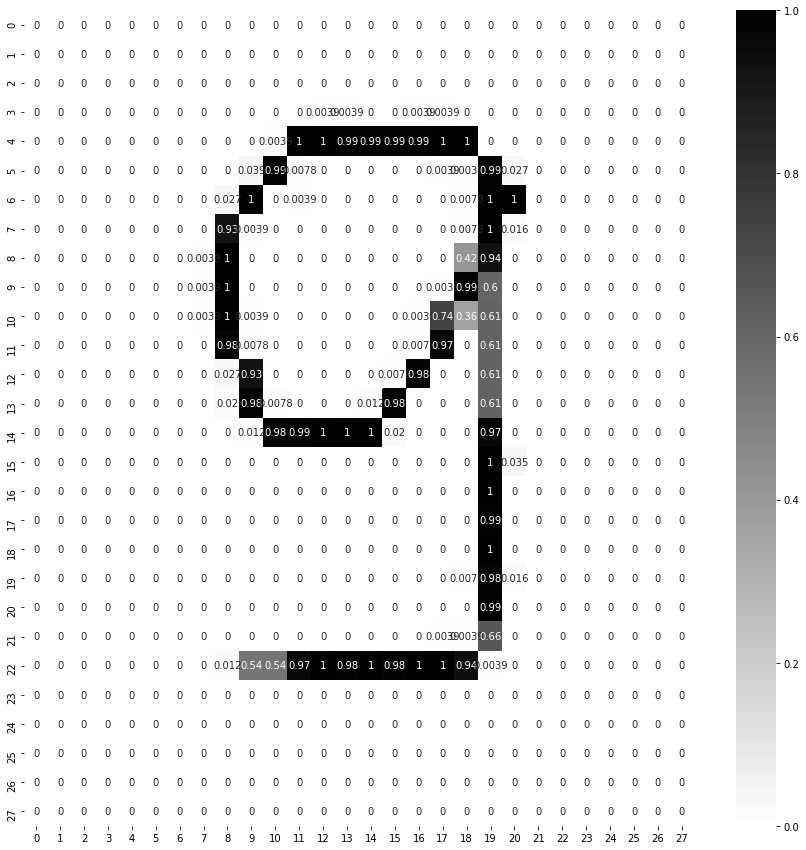

In [21]:
predict_("nine.JPG")

2


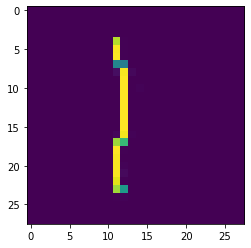

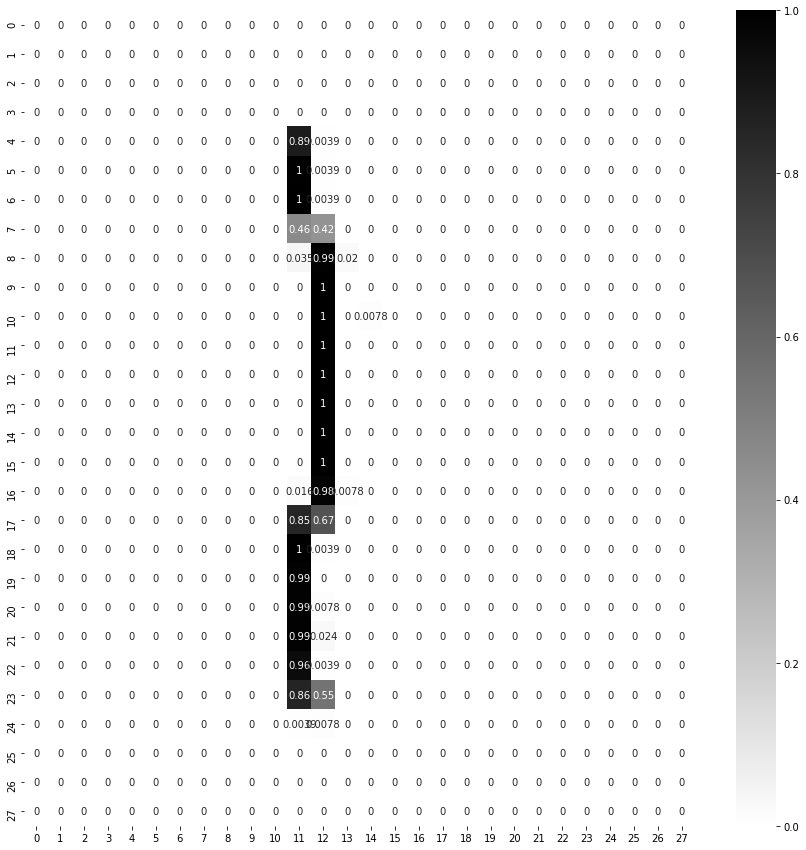

In [22]:
predict_("one.JPG")

7


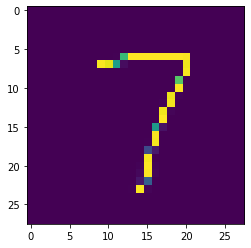

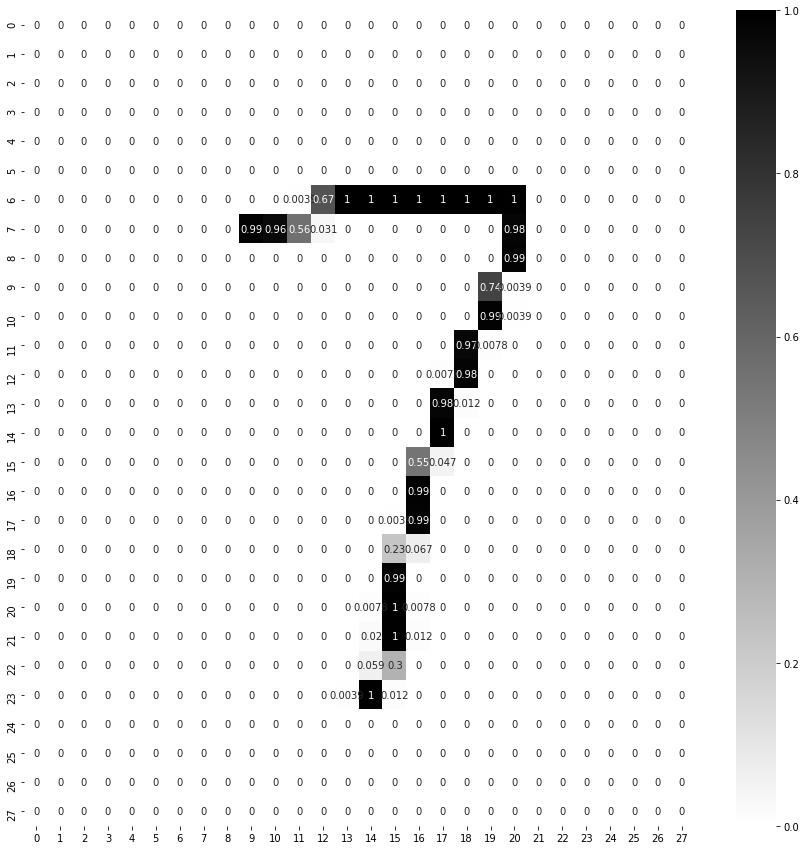

In [23]:
predict_("seven.JPG")

6


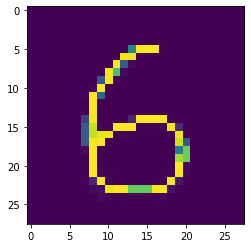

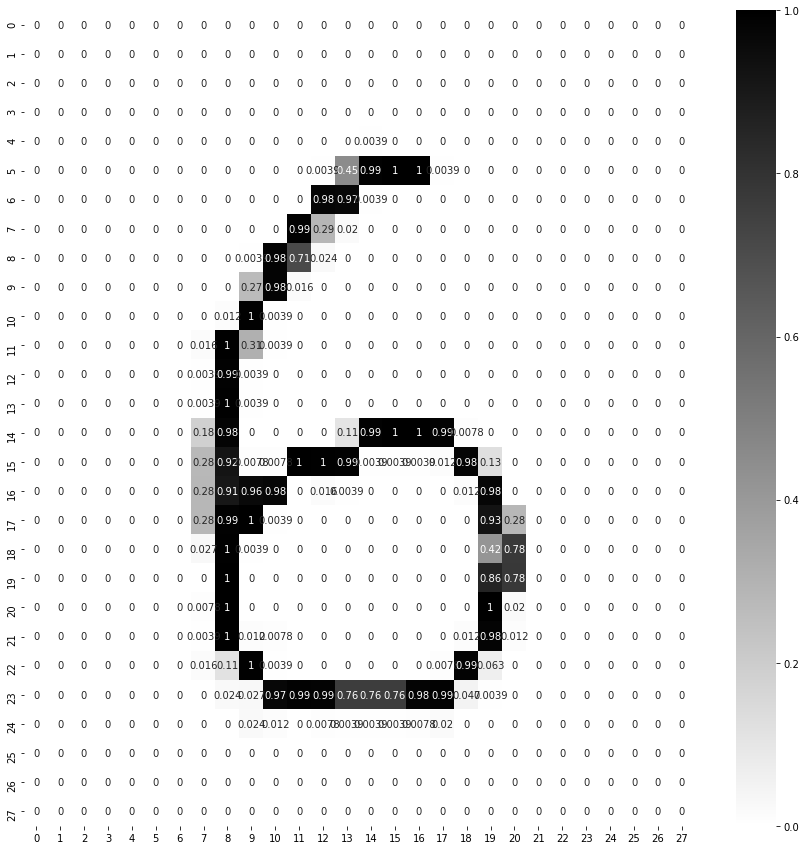

In [24]:
predict_("six.JPG")

3


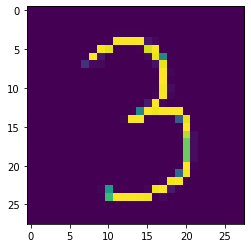

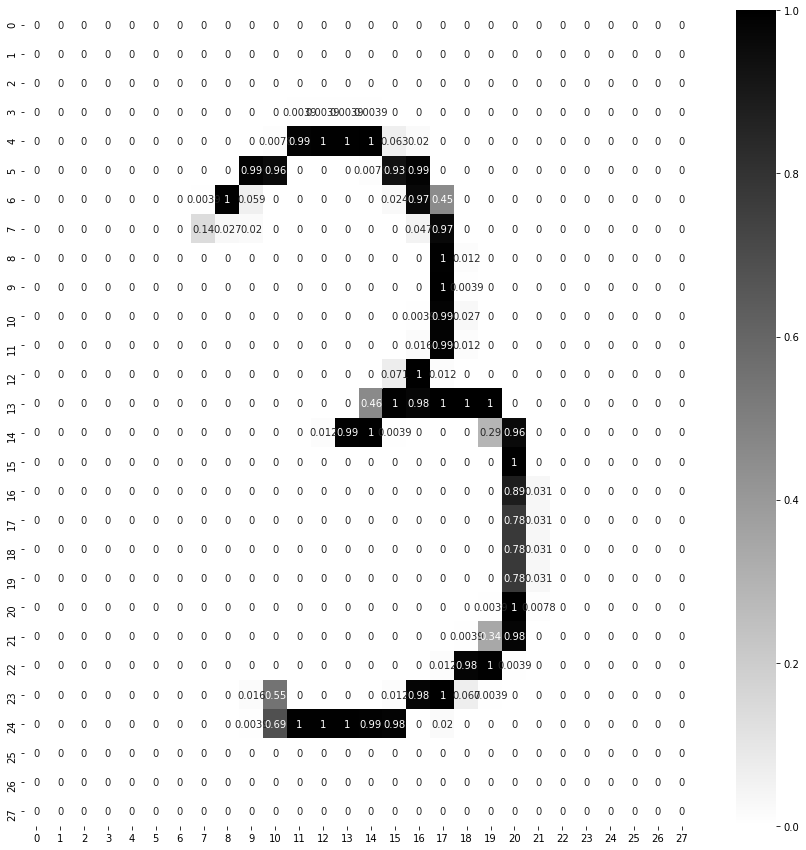

In [25]:
predict_("three.JPG")

2


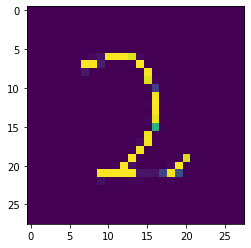

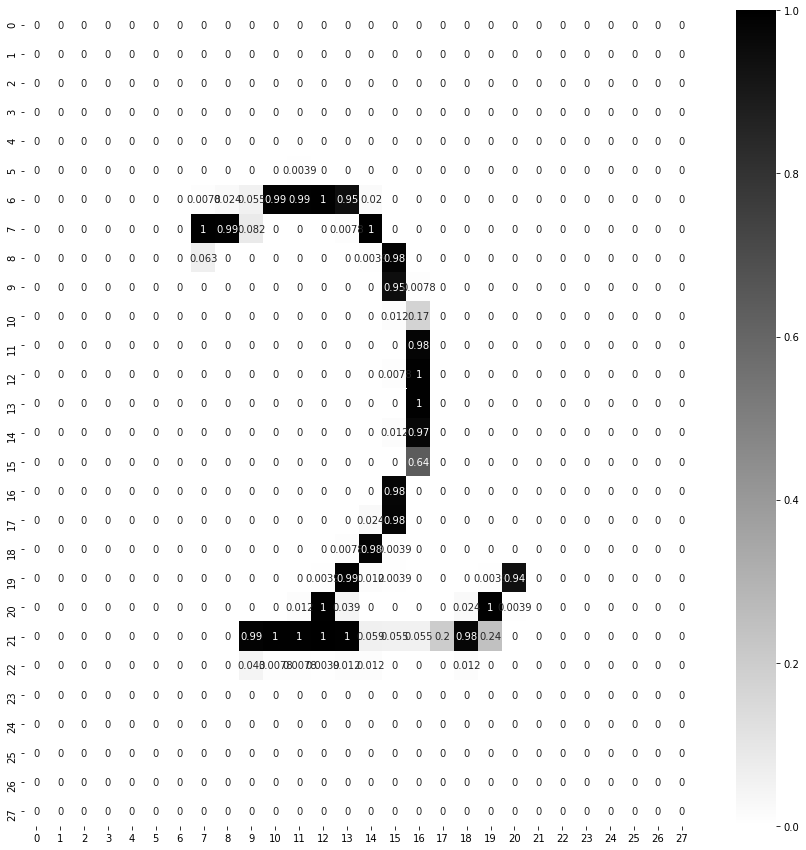

In [26]:
predict_("two.JPG")

2


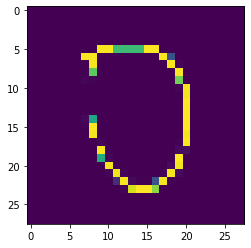

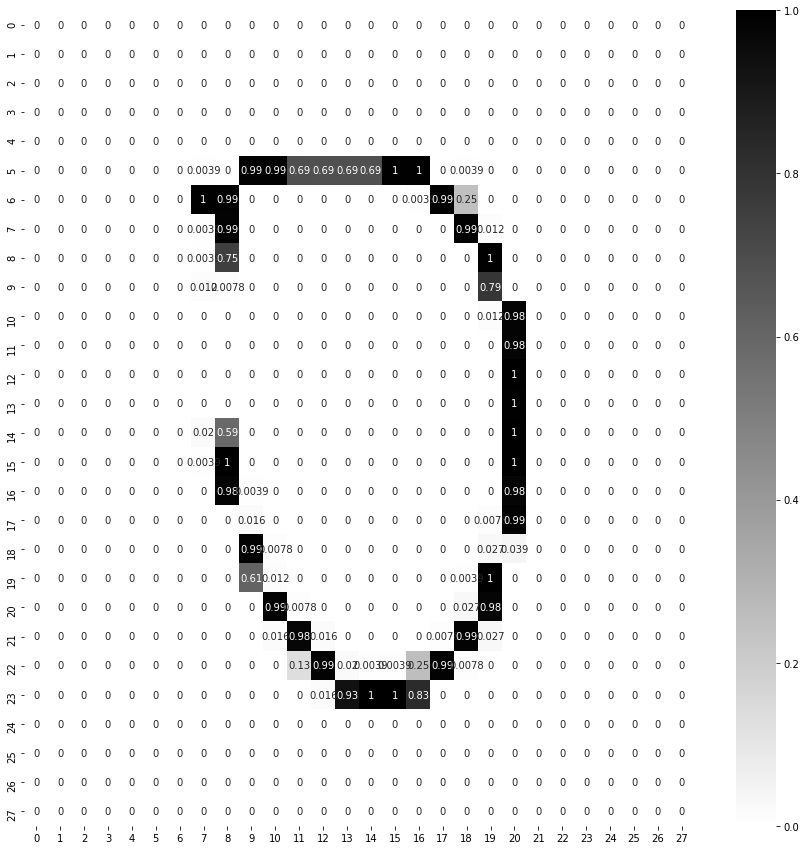

In [27]:
predict_("zero.JPG")